In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.pyplot import scatter, annotate, show

In [32]:
foods = pd.read_csv('food_consumption.csv')

# Remove first column
data = foods.iloc[:, 1:]

# Get first column
countries = foods.iloc[:, 0]

# Print dimensions of data
print(data.shape)
data.head()
countries.head()

(16, 20)


0    Germany
1      Italy
2     France
3    Holland
4    Belgium
Name: Country, dtype: object

### PCA Without Feature Scaled

In [30]:
# PCA model to fit data using 2 components
pca = PCA(n_components=2)
pca.fit(data)
new_x = pca.transform(data)

print(new_x.shape)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)


(16, 2)
[0.31536634 0.20907587]
[206.08975482 167.80337227]
[[ 0.03798527 -0.1337862  -0.2687898  -0.1604466  -0.11954424 -0.08332813
  -0.28509817 -0.05679119 -0.09552423 -0.14474104 -0.12602957 -0.04027136
  -0.29608149 -0.33615173  0.57152639 -0.10427176 -0.17721325  0.34102375
   0.0037325  -0.2084555 ]
 [ 0.18194259 -0.45509041  0.00787195  0.01802302 -0.35983694 -0.23387602
  -0.12460296  0.04784199  0.15336669  0.08188076 -0.2447234  -0.13248793
  -0.30161676 -0.07463049 -0.26561426 -0.10933455 -0.04342564 -0.19444716
  -0.27533512  0.39393754]]


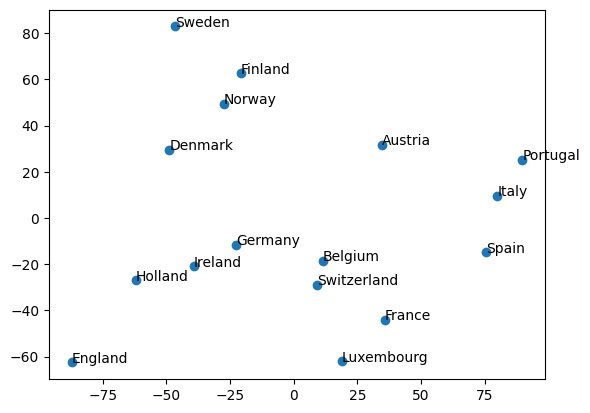

In [33]:
scatter(x=new_x[:, 0], y=new_x[:, 1])
for i in range(len(countries)):
  annotate(countries[i], (new_x[i, 0], new_x[i, 1]))
show()

In [ ]:
# Plot the first two components
plt.figure()
plt.scatter(pca.components_[0], pca.components_[1])
# put countries annotations
for i in range(len(countries)):
    plt.annotate(countries[i], (pca.components_[0][i], pca.components_[1][i]))
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('Principal Component Analysis')
plt.show()


### PCA With Feature Scaled

In [15]:
# Do the Feature Scaling before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)


In [38]:
scaled_pca = PCA(n_components=2)
scaled_pca.fit(data_scaled)

scaled_x = scaled_pca.transform(data_scaled)

print(scaled_pca.components_)

[[-0.03429334 -0.17514524 -0.29838731 -0.34305179 -0.08167293 -0.17267114
  -0.30954539 -0.19930947 -0.20598487 -0.30493416 -0.24247707 -0.19328461
  -0.34811938 -0.27566653  0.25354067 -0.11631484 -0.128581    0.16374792
  -0.0940529  -0.17506557]
 [ 0.18295037 -0.37676474  0.0457057   0.10908354 -0.31684515 -0.32189471
  -0.05846205  0.18584921  0.34034418  0.25282893 -0.24919893 -0.13826959
  -0.17836151 -0.05864005 -0.16500255 -0.06624193  0.01021606 -0.10000961
  -0.2995349   0.37544172]]


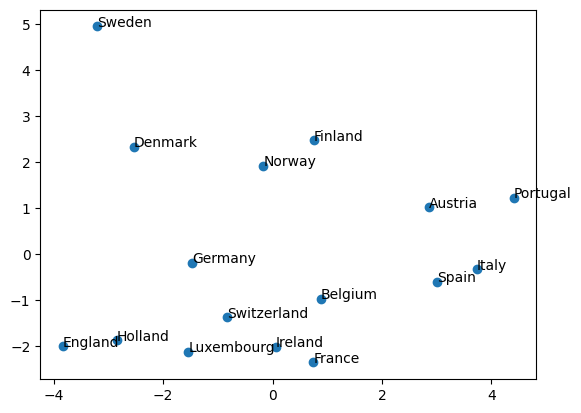

In [39]:
scatter(x=scaled_x[:, 0], y=scaled_x[:, 1])
for i in range(len(countries)):
  annotate(countries[i], (scaled_x[i, 0], scaled_x[i, 1]))

In [ ]:
# Plot results
plt.figure()
plt.scatter(scaled_pca.components_[0], scaled_pca.components_[1])
# put countries annotations
for i in range(len(countries)):
    plt.annotate(countries[i], (scaled_pca.components_[0][i], scaled_pca.components_[1][i]))
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('Principal Component Analysis with Scaling')
plt.show()

### Max-Min Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data)
data_min_max_scaled = min_max_scaler.transform(data)


In [43]:
min_max_pca = PCA(n_components=2)
min_max_pca.fit(data_min_max_scaled)

min_max_x = min_max_pca.transform(data_min_max_scaled)

print(min_max_pca.explained_variance_ratio_)
print(min_max_pca.singular_values_)
print(min_max_pca.components_)

[0.30356801 0.19793768]
[2.95638882 2.38724934]
[[-0.02576473 -0.13954098 -0.32550416 -0.37180888 -0.06150817 -0.14723041
  -0.26170135 -0.14498186 -0.18692708 -0.29052727 -0.17530842 -0.11917293
  -0.2936803  -0.27895864  0.3940743  -0.11323475 -0.17557069  0.24422178
  -0.05430895 -0.17554982]
 [ 0.16043674 -0.410585    0.01404345  0.05809458 -0.24790263 -0.38398728
  -0.07914961  0.09391057  0.2580564   0.18537122 -0.2599207  -0.18058484
  -0.2221668  -0.06836401 -0.23844995 -0.07280886  0.01932845 -0.13381284
  -0.38359392  0.3088394 ]]


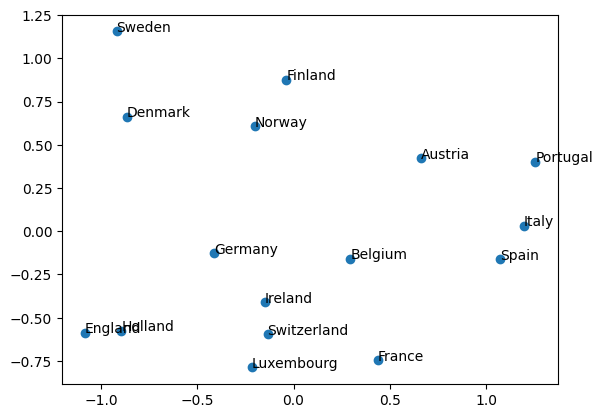

In [44]:
scatter(x=min_max_x[:, 0], y=min_max_x[:, 1])
for i in range(len(countries)):
  annotate(countries[i], (min_max_x[i, 0], min_max_x[i, 1]))
show()

In [ ]:
# Plot results
plt.figure()
plt.scatter(min_max_pca.components_[0], min_max_pca.components_[1])
# put countries annotations
for i in range(len(countries)):
    plt.annotate(countries[i], (min_max_pca.components_[0][i], min_max_pca.components_[1][i]))
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('Principal Component Analysis with MinMax Scaling')
plt.show()

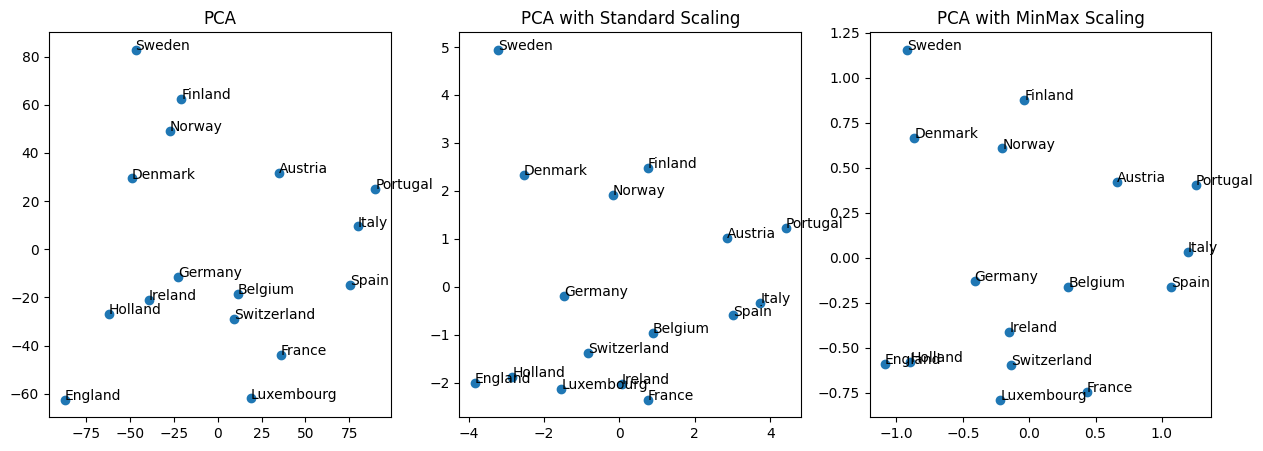

In [50]:
# Plot 3 graphs together
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(new_x[:, 0], new_x[:, 1])
for i in range(len(countries)):
    axs[0].annotate(countries[i], (new_x[i, 0], new_x[i, 1]))
axs[0].set_title('PCA')
axs[1].scatter(scaled_x[:, 0], scaled_x[:, 1])
for i in range(len(countries)):
    axs[1].annotate(countries[i], (scaled_x[i, 0], scaled_x[i, 1]))
axs[1].set_title('PCA with Standard Scaling')
axs[2].scatter(min_max_x[:, 0], min_max_x[:, 1])
for i in range(len(countries)):
    axs[2].annotate(countries[i], (min_max_x[i, 0], min_max_x[i, 1]))
axs[2].set_title('PCA with MinMax Scaling')
plt.show()
